# E.D.A  Dataset sales_data.csv

#### Import libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Read dataset 

In [1]:

sales_data = pd.read_csv('./sales_data.csv', encoding='utf-8')
sales_data.head()

NameError: name 'pd' is not defined

#### Contexto Dataset 

Este Dataset fue extraido de la pagina web kaggle una plataforma de competencia de ciencia de datos y una comunidad en línea para científicos de datos y profesionales del aprendizaje automático de Google LLC.

Este Dataset contiene informacion sobre vuelos retrasados en el año 2019 con informacion sobre el clima, aereopuerto entre otros, para un mayor detalle puede visitar la pagina de donde salio en el siguiente enlace: https://www.kaggle.com/datasets/threnjen2019-airline-delays-and-cancellations?select=train.csv

##### Exploramos el Dataset para ver su contenido

Numero de filas y columnas 

In [96]:
num_rows, num_columns = sales_data.shape
print(f"Tamaño del Dataset: {num_rows} filas y {num_columns} columnas")

Tamaño del Dataset: 113036 filas y 18 columnas


Revisamos el tipo de datos y la cantidad de valores unicos en el dataset 

In [97]:
summary = pd.DataFrame({
    'Tipo de Dato': sales_data.dtypes,
    'Valores Únicos': [sales_data[col].nunique() for col in sales_data.columns],
})

summary

,Tipo de Dato,Valores Únicos
Date,object,1884
Day,int64,31
Month,object,12
Year,int64,6
Customer_Age,int64,70
Age_Group,object,4
Customer_Gender,object,2
Country,object,6
State,object,53
Product_Category,object,3


##### Descripcion de columnas 

## Sales Information:

- **Daily Sales**: Provides a detailed view of daily sales activity, enabling users to track fluctuations and short-term trends.

- **Monthly Sales**: Summarizes sales data on a monthly basis, helping to observe trends, seasonality, and growth patterns.

- **Yearly Sales**: Offers an overview of annual sales performance, making it easier to identify long-term trends and growth.
**Product Information:**

- **Product Identifiers**:

- **Product IDs**: Unique identifiers for each product in the dataset.
- **Units Sold**:

- **Sales Quantity**: Number of units sold for each product.
- **Revenue**:

- **Sales Revenue**: Total revenue generated by each product.
**Customer Demographics:**

- **Geographical Location**:

    - **Country**: The country where the customer is located.
    - **State**: The state or region within the country.
- **Customer Characteristics**:

    - **Age**: The age of the customer.

#### Limpieza de Datos 

##### Verificamos la calidad de los datos

Miramos si hay valores nulos 

In [98]:
print("Valores Nulos:")
valores_nulos = pd.DataFrame(sales_data.isnull().sum())

valores_nulos

Valores Nulos:


,0
Date,0
Day,0
Month,0
Year,0
Customer_Age,0
Age_Group,0
Customer_Gender,0
Country,0
State,0
Product_Category,0


Miramos si hay valores duplicados 

In [99]:
print("\nValores Duplicados:")
print(f"Número de filas duplicadas: {sales_data.duplicated().sum()}")


Valores Duplicados:
Número de filas duplicadas: 1000


In [100]:
# Mostramos los registros duplicados
print("Registros duplicados:")
duplicados = sales_data[sales_data.duplicated()]
print(duplicados)


Registros duplicados:
              Date  Day      Month  Year  Customer_Age             Age_Group  \
1021    2013-12-19   19   December  2013            22           Youth (<25)   
1091    2015-09-30   30  September  2015            42        Adults (35-64)   
1093    2013-10-24   24    October  2013            42        Adults (35-64)   
1095    2015-10-24   24    October  2015            42        Adults (35-64)   
1193    2016-01-15   15    January  2016            42        Adults (35-64)   
...            ...  ...        ...   ...           ...                   ...   
111029  2014-02-18   18   February  2014            49        Adults (35-64)   
111031  2016-02-18   18   February  2016            49        Adults (35-64)   
111265  2014-04-27   27      April  2014            31  Young Adults (25-34)   
111953  2013-09-20   20  September  2013            42        Adults (35-64)   
111955  2015-09-20   20  September  2015            42        Adults (35-64)   

       Customer_G

In [101]:
duplicated_indices = sales_data.duplicated(keep=False)
duplicated_records = sales_data[duplicated_indices].sort_index()

print("Ejemplos de registros duplicados y sus duplicados:")
duplicated_records


Ejemplos de registros duplicados y sus duplicados:


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
1020,2013-12-19,19,December,2013,22,Youth (<25),M,Australia,New South Wales,Accessories,Bike Stands,All-Purpose Bike Stand,9,59,159,714,531,1245
1021,2013-12-19,19,December,2013,22,Youth (<25),M,Australia,New South Wales,Accessories,Bike Stands,All-Purpose Bike Stand,9,59,159,714,531,1245
1090,2015-09-30,30,September,2015,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,5,4,10,20,20,40
1091,2015-09-30,30,September,2015,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,5,4,10,20,20,40
1092,2013-10-24,24,October,2013,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,2,4,10,8,8,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111265,2014-04-27,27,April,2014,31,Young Adults (25-34),M,United States,Washington,Bikes,Touring Bikes,"Touring-1000 Blue, 50",1,1482,2384,378,1482,1860
111952,2013-09-20,20,September,2013,42,Adults (35-64),M,Canada,British Columbia,Bikes,Touring Bikes,"Touring-3000 Yellow, 44",1,461,742,274,461,735
111953,2013-09-20,20,September,2013,42,Adults (35-64),M,Canada,British Columbia,Bikes,Touring Bikes,"Touring-3000 Yellow, 44",1,461,742,274,461,735
111954,2015-09-20,20,September,2015,42,Adults (35-64),M,Canada,British Columbia,Bikes,Touring Bikes,"Touring-3000 Yellow, 44",1,461,742,274,461,735


In [102]:
duplicate_counts = sales_data[sales_data.duplicated(keep=False)].groupby(list(sales_data.columns)).size()

duplicate_summary = duplicate_counts.value_counts().sort_index()

print("Resume of duplicates:")
for num_duplicates, count in duplicate_summary.items():
    print(f"{num_duplicates} duplicates: {count} rows")


Resume of duplicates:
2 duplicates: 986 rows
3 duplicates: 7 rows


Filtramos los registros que tienen exactamente 3 duplicados

In [103]:
registros_con_3_duplicados = sales_data[sales_data.duplicated(keep=False)].groupby(list(sales_data.columns)).filter(lambda x: len(x) == 3)

print("Registros con exactamente 3 duplicados:")
print(registros_con_3_duplicados)


Registros con exactamente 3 duplicados:
             Date  Day      Month  Year  Customer_Age             Age_Group  \
1594   2013-11-22   22   November  2013            31  Young Adults (25-34)   
1595   2013-11-22   22   November  2013            31  Young Adults (25-34)   
1597   2013-11-22   22   November  2013            31  Young Adults (25-34)   
2812   2014-03-17   17      March  2014            35        Adults (35-64)   
2814   2014-03-17   17      March  2014            35        Adults (35-64)   
2815   2014-03-17   17      March  2014            35        Adults (35-64)   
70120  2012-11-27   27   November  2012            27  Young Adults (25-34)   
70121  2012-11-27   27   November  2012            27  Young Adults (25-34)   
70122  2012-11-27   27   November  2012            27  Young Adults (25-34)   
79092  2013-09-15   15  September  2013            27  Young Adults (25-34)   
79093  2013-09-15   15  September  2013            27  Young Adults (25-34)   
79094  2013-

we dont have to drop duplicates beacuase if possible that the same person can buy the same product more than once the same day

Comprobamos

In [104]:
print("\nValores Duplicados:")
print(f"Número de filas duplicadas: {sales_data.duplicated().sum()}")


Valores Duplicados:
Número de filas duplicadas: 1000


##### Buscamos datos atípicos 

Para las columnas del dia de la semana, mes y la que indica si un vuelo fue retrasado o no, traemos el valor minimo y maximo de para verificar que no hayan datos incoherentes 

In [105]:
sales_data.columns


Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

verify the min and max values of the columns 

In [106]:
max_month = sales_data['Month'].max()
min_month = sales_data['Month'].min()

max_day_of_week = sales_data['Day'].max()
min_day_of_week = sales_data['Day'].min()

max_Year = sales_data['Year'].max()
min_Year = sales_data['Year'].min()

max_Customer_Age = sales_data['Customer_Age'].max()
min_Customer_Age = sales_data['Customer_Age'].min()

max_Order_Quantity = sales_data['Order_Quantity'].max()
min_Order_Quantity = sales_data['Order_Quantity'].min()

max_Unit_Cost = sales_data['Unit_Cost'].max()
min_Unit_Cost = sales_data['Unit_Cost'].min()

max_Unit_Price  = sales_data['Unit_Price'].max()
min_Unit_Price = sales_data['Unit_Price'].min()

max_Profit  = sales_data['Profit'].max()
min_Profit = sales_data['Profit'].min()

max_Cost  = sales_data['Cost'].max()
min_Cost = sales_data['Cost'].min()

max_Revenue = sales_data['Revenue'].max()
min_Revenue = sales_data['Revenue'].min()

print(f"Maximum value of 'MONTH': {max_month}")
print(f"Minimum value of 'MONTH': {min_month}")
print(f"Maximum value of 'DAY_OF_WEEK': {max_day_of_week}")
print(f"Minimum value of 'DAY_OF_WEEK': {min_day_of_week}")
print(f"Maximum value of 'Customer_Age': {max_Customer_Age}")
print(f"Minimum value of 'Customer_Age': {min_Customer_Age}")

print(f"Maximum value of 'Order_Quantity': {max_Order_Quantity}")
print(f"Minimum value of 'Order_Quantity': {min_Order_Quantity}")

print(f"Maximum value of 'Year': {max_Year}")
print(f"Minimum value of 'Year': {min_Year}")

print(f"Maximum value of 'Unit_Cost': {max_Unit_Cost}")
print(f"Minimum value of 'Unit_Cost': {min_Unit_Cost}")

print(f"Maximum value of 'Unit_Price': {max_Unit_Price}")
print(f"Minimum value of 'Unit_Price': {min_Unit_Price}")

print(f"Maximum value of 'Profit': {max_Profit}")
print(f"Minimum value of 'Profit': {min_Profit}")

print(f"Maximum value of 'Cost': {max_Cost}")
print(f"Minimum value of 'Cost': {min_Cost}")

print(f"Maximum value of 'Revenue': {max_Revenue}")
print(f"Minimum value of 'Revenue': {min_Revenue}")


Valor máximo de 'MONTH': September
Valor mínimo de 'MONTH': April
Valor máximo de 'DAY_OF_WEEK': 31
Valor mínimo de 'DAY_OF_WEEK': 1
Valor máximo de 'max_Customer_Age': 87
Valor mínimo de 'min_Customer_Age': 17
Valor máximo de 'max_Order_Quantity': 32
Valor mínimo de 'max_Order_Quantity': 1
Valor máximo de 'DEP_del15': 2016
Valor mínimo de 'DEP_del15': 2011
Valor máximo de 'max_Unit_Cost': 2171
Valor mínimo de 'min_Unit_Cost': 1
Valor máximo de 'max_Unit_Price': 3578
Valor mínimo de 'min_Unit_Price': 2
Valor máximo de 'max_Profit': 15096
Valor mínimo de 'min_Profit': -30
Valor máximo de 'max_Cost': 42978
Valor mínimo de 'min_Cost': 1
Valor máximo de 'max_Revenue': 58074
Valor mínimo de 'min_Revenue': 2


we can see that the data is coherent because they are 12 months represented with numbers, and the 7 days of the week are also represented with numbers , and all columns are coherent with the data they represent , an exception min_profit that is negative, "-7",  but this is not a problem because the profit can be negative , but lets check

In [107]:
negative_profit_records = sales_data[sales_data['Profit'] < 0]
print("Records where 'Profit' is less than 0:")
negative_profit_records


Records where 'Profit' is less than 0:


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
17098,2013-12-09,9,December,2013,20,Youth (<25),M,France,Yveline,Clothing,Caps,AWC Logo Cap,21,7,9,-3,147,144
17099,2015-12-09,9,December,2015,20,Youth (<25),M,France,Yveline,Clothing,Caps,AWC Logo Cap,23,7,9,-4,161,157
17484,2013-10-23,23,October,2013,34,Young Adults (25-34),M,France,Yveline,Clothing,Caps,AWC Logo Cap,28,7,9,-4,196,192
17485,2015-10-23,23,October,2015,34,Young Adults (25-34),M,France,Yveline,Clothing,Caps,AWC Logo Cap,29,7,9,-5,203,198
17486,2014-03-23,23,March,2014,34,Young Adults (25-34),M,France,Yveline,Clothing,Caps,AWC Logo Cap,4,7,9,-1,28,27
17662,2013-11-18,18,November,2013,48,Adults (35-64),M,France,Yveline,Clothing,Caps,AWC Logo Cap,21,7,9,-3,147,144
17663,2015-11-18,18,November,2015,48,Adults (35-64),M,France,Yveline,Clothing,Caps,AWC Logo Cap,19,7,9,-3,133,130
17972,2013-09-12,12,September,2013,22,Youth (<25),M,France,Yveline,Clothing,Caps,AWC Logo Cap,4,7,9,-1,28,27
17973,2015-09-12,12,September,2015,22,Youth (<25),M,France,Yveline,Clothing,Caps,AWC Logo Cap,4,7,9,-1,28,27
18130,2014-07-07,7,July,2014,30,Young Adults (25-34),M,France,Yveline,Clothing,Caps,AWC Logo Cap,13,7,9,-2,91,89


we can seee incongruent data in unit price column because if we do quantity * unit price we get a lowest number in the revenue column

we test if the formula is valid for the revenue column 
Unit_Price * Order_Quantity = Revenue

In [108]:
sales_data['Validation'] = sales_data['Unit_Price'] * sales_data['Order_Quantity'] == sales_data['Revenue']

valid_records = sales_data[sales_data['Validation']]
valid_records

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Validation
266,2013-12-17,17,December,2013,24,Youth (<25),F,Canada,Alberta,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,300,180,480,True
267,2015-12-17,17,December,2015,24,Youth (<25),F,Canada,Alberta,Accessories,Bike Racks,Hitch Rack - 4-Bike,6,45,120,450,270,720,True
428,2014-03-28,28,March,2014,54,Adults (35-64),F,Canada,Alberta,Accessories,Bike Racks,Hitch Rack - 4-Bike,7,45,120,525,315,840,True
429,2016-03-28,28,March,2016,54,Adults (35-64),F,Canada,Alberta,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,375,225,600,True
1211,2016-07-09,9,July,2016,65,Seniors (64+),M,Canada,British Columbia,Accessories,Bottles and Cages,Mountain Bottle Cage,3,4,10,18,12,30,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108262,2014-07-18,18,July,2014,23,Youth (<25),M,United Kingdom,England,Accessories,Tires and Tubes,Touring Tire Tube,1,2,5,3,2,5,True
108264,2016-07-18,18,July,2016,23,Youth (<25),M,United Kingdom,England,Accessories,Tires and Tubes,Touring Tire Tube,1,2,5,3,2,5,True
108356,2015-10-10,10,October,2015,55,Adults (35-64),M,France,Seine (Paris),Accessories,Tires and Tubes,Patch Kit/8 Patches,1,1,2,1,1,2,True
110348,2014-06-30,30,June,2014,39,Adults (35-64),F,Canada,Alberta,Bikes,Touring Bikes,"Touring-1000 Blue, 46",1,1482,2384,902,1482,2384,True


some records its satisfy the formula , for that we can conclude that the other records are not satisfy the formula , because if not count the discounts for many reasons

can be :

- Discounts or Promotions:

- The final selling price may have been lower than the cost to attract customers.

- Additional Costs Not Reflected in Unit Cost:

    - Shipping expenses.

    - Returns or refunds.

    - Wastage or defective products.

drop the validation column because we dont need it 

In [109]:
sales_data.drop(columns=['Validation'], inplace=True)
sales_data.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


## we create a new column to see the discount that probably was made for each record 

**Formula**
- Order_Quantity * Unit_Price - Revenue

In [110]:
sales_data['Discount'] = sales_data['Order_Quantity'] * sales_data['Unit_Price'] - sales_data['Revenue']
sales_data


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Discount
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,10
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,10
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,359
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,312
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184,8
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183,225
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183,225
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260,276


we verify if there are negative values in the discount column , to validate if the hipotesis is correct 

In [111]:
negative_Discount_records = sales_data[sales_data['Discount'] < 0]
print("Registros donde 'Profit' es menor a 0:")
negative_Discount_records


Registros donde 'Profit' es menor a 0:


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Discount


no , record , thats look good, we can confirm the hypotesis that the incosistent data with the columns  revenue and unit price  its because possible this order have a discount o taxes that are not incluied in the dataset 

lets see Discount <= 0 


In [112]:
negative_Discount_records = sales_data[sales_data['Discount'] <= 0]
print("Registros donde 'Profit' es menor a 0:")
negative_Discount_records

Registros donde 'Profit' es menor a 0:


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Discount
266,2013-12-17,17,December,2013,24,Youth (<25),F,Canada,Alberta,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,300,180,480,0
267,2015-12-17,17,December,2015,24,Youth (<25),F,Canada,Alberta,Accessories,Bike Racks,Hitch Rack - 4-Bike,6,45,120,450,270,720,0
428,2014-03-28,28,March,2014,54,Adults (35-64),F,Canada,Alberta,Accessories,Bike Racks,Hitch Rack - 4-Bike,7,45,120,525,315,840,0
429,2016-03-28,28,March,2016,54,Adults (35-64),F,Canada,Alberta,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,375,225,600,0
1211,2016-07-09,9,July,2016,65,Seniors (64+),M,Canada,British Columbia,Accessories,Bottles and Cages,Mountain Bottle Cage,3,4,10,18,12,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108262,2014-07-18,18,July,2014,23,Youth (<25),M,United Kingdom,England,Accessories,Tires and Tubes,Touring Tire Tube,1,2,5,3,2,5,0
108264,2016-07-18,18,July,2016,23,Youth (<25),M,United Kingdom,England,Accessories,Tires and Tubes,Touring Tire Tube,1,2,5,3,2,5,0
108356,2015-10-10,10,October,2015,55,Adults (35-64),M,France,Seine (Paris),Accessories,Tires and Tubes,Patch Kit/8 Patches,1,1,2,1,1,2,0
110348,2014-06-30,30,June,2014,39,Adults (35-64),F,Canada,Alberta,Bikes,Touring Bikes,"Touring-1000 Blue, 46",1,1482,2384,902,1482,2384,0


effectively , the discount column is coherent  , with the last  query we can see the same 64449 records 

## Graphical Analysis 

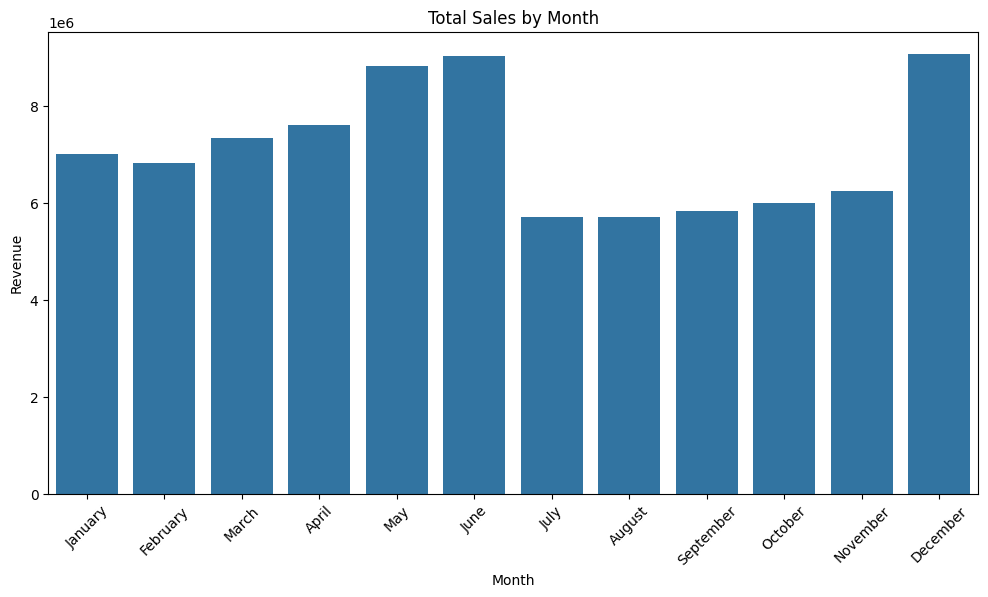

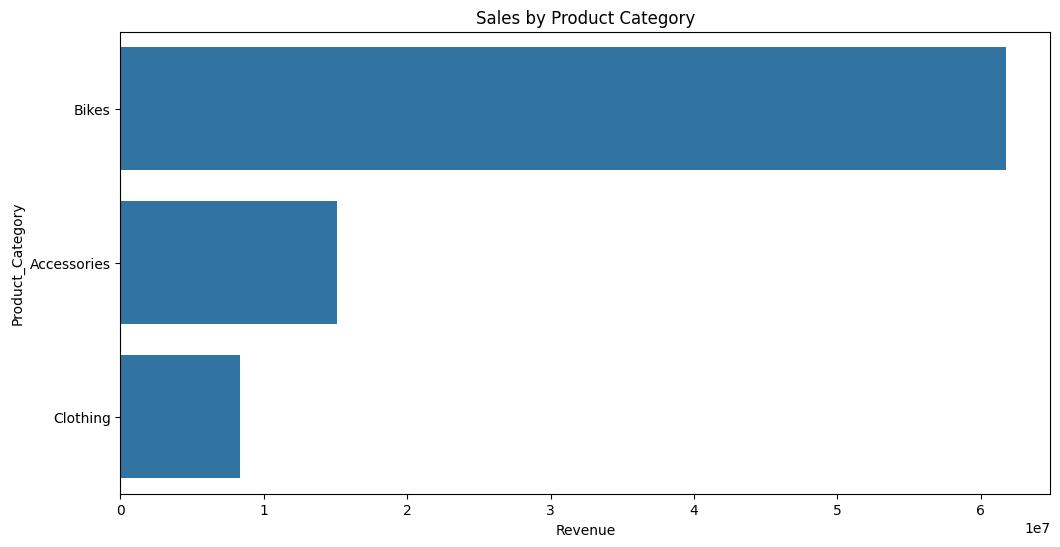

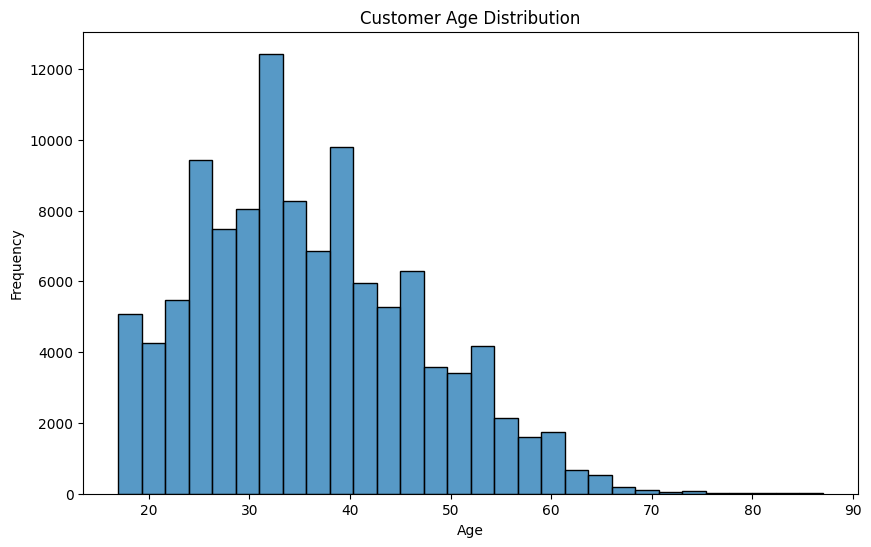

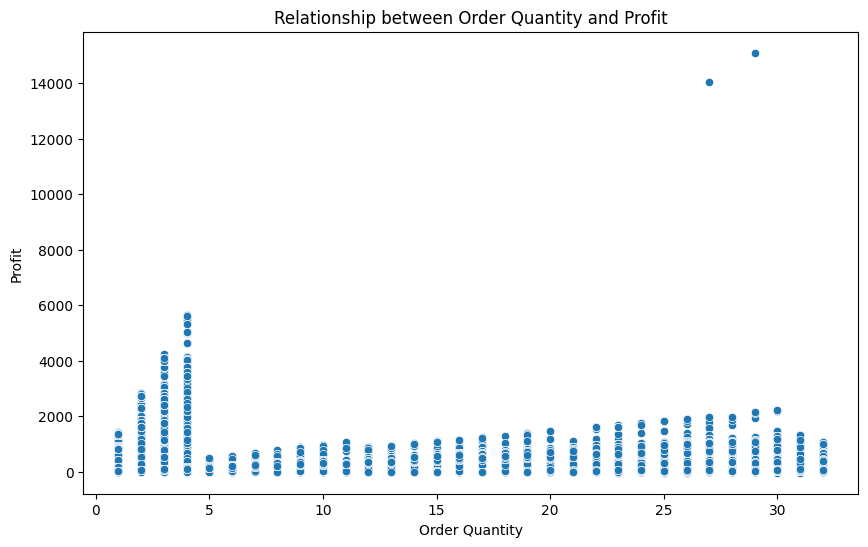

<Figure size 1200x600 with 0 Axes>

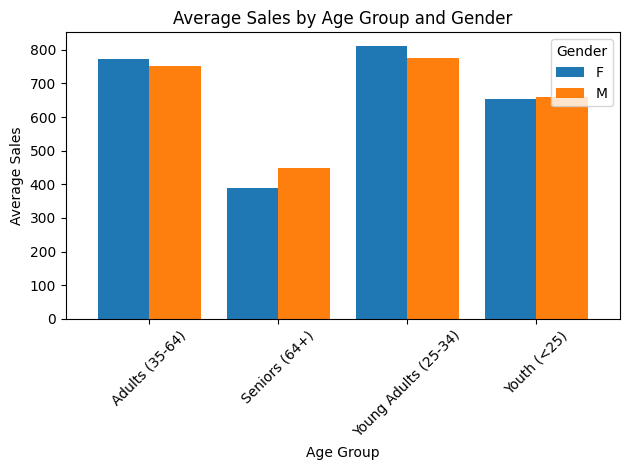

In [113]:
# 1. Monthly sales analysis
plt.figure(figsize=(12, 6))
monthly_sales = sales_data.groupby('Month')['Revenue'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Total Sales by Month')
plt.xticks(rotation=45)
plt.ylabel('Revenue')
plt.show()

# 2. Sales distribution by product category
plt.figure(figsize=(12, 6))
sales_by_category = sales_data.groupby('Product_Category')['Revenue'].sum().sort_values(ascending=False)
sns.barplot(x=sales_by_category.values, y=sales_by_category.index)
plt.title('Sales by Product Category')
plt.xlabel('Revenue')
plt.show()

# 3. Customer age analysis
plt.figure(figsize=(10, 6))
sns.histplot(data=sales_data, x='Customer_Age', bins=30)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 4. Relationship between order quantity and profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sales_data, x='Order_Quantity', y='Profit')
plt.title('Relationship between Order Quantity and Profit')
plt.xlabel('Order Quantity')
plt.ylabel('Profit')
plt.show()

# 5. Sales by age group and gender
plt.figure(figsize=(12, 6))
avg_sales = sales_data.groupby(['Age_Group', 'Customer_Gender'])['Revenue'].mean().unstack()
avg_sales.plot(kind='bar', width=0.8)
plt.title('Average Sales by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Sales')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

sales monthly by each year 

<Figure size 1400x700 with 0 Axes>

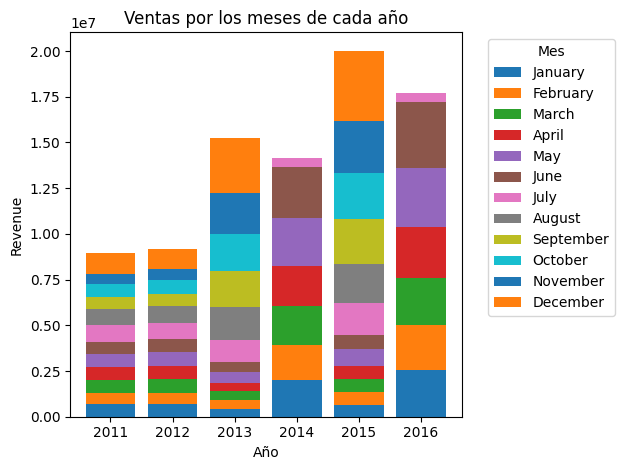

In [114]:
plt.figure(figsize=(14, 7))
monthly_sales_by_year = sales_data.groupby(['Year', 'Month'])['Revenue'].sum().unstack().reindex(columns=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
monthly_sales_by_year.plot(kind='bar', stacked=True, width=0.8)
plt.title('Ventas por los meses de cada año')
plt.xlabel('Año')
plt.ylabel('Revenue')
plt.legend(title='Mes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


we can see that the sales are higher in the last months of the year , and the lowest in the first months of the year , this is a good indicator to know when is the best time to launch a marketing campaign to increase sales 

and we can see too that in 2014 and 2016 doesnt have some records for some months


In [115]:
months_per_year = sales_data.pivot_table(index='Year', columns='Month', values='Revenue', aggfunc='sum', fill_value=0)

print(months_per_year)

Month    April   August  December  February  January     July     June  \
Year                                                                     
2011    698782   880037   1132666    637598   675193   882219   658138   
2012    731005   927504   1110101    642657   671695   863284   691871   
2013    476905  1763071   2995953    485405   435063  1230711   534099   
2014   2204586        0         0   1945487  2003941   516887  2786120   
2015    734608  2140581   3848211    679246   666938  1728398   786480   
2016   2756864        0         0   2444190  2553065   499960  3586300   

Month    March      May  November  October  September  
Year                                                   
2011    708517   734537    574498   696949     685754  
2012    740824   765660    601501   727918     701963  
2013    466940   589689   2232077  2041128    1988996  
2014   2108212  2587491         0        0          0  
2015    714008   895043   2836222  2529084    2465172  
2016   2608663 

 effectly this data is not complete for those years , for that we are going to drop this rows , because we want to analyze the data by year and month 

In [116]:
sales_data = sales_data[sales_data['Year'] != 2014]
sales_data = sales_data[sales_data['Year'] != 2016]

months_per_year = sales_data.pivot_table(index='Year', columns='Month', values='Revenue', aggfunc='sum', fill_value=0)

print(months_per_year)

Month   April   August  December  February  January     July    June   March  \
Year                                                                           
2011   698782   880037   1132666    637598   675193   882219  658138  708517   
2012   731005   927504   1110101    642657   671695   863284  691871  740824   
2013   476905  1763071   2995953    485405   435063  1230711  534099  466940   
2015   734608  2140581   3848211    679246   666938  1728398  786480  714008   

Month     May  November  October  September  
Year                                         
2011   734537    574498   696949     685754  
2012   765660    601501   727918     701963  
2013   589689   2232077  2041128    1988996  
2015   895043   2836222  2529084    2465172  


In [117]:
sales_data.to_csv('./sales_data_cleaned.csv', index=False)